In [2]:
import pandas as pd
import numpy as np 
import os

TASK 1: MERGE 12 months of data into a single csv

In [23]:
#Getting all file name in folder
myfiles = [file for file in os.listdir("Sales_Data")]


finalDF = pd.DataFrame()
#Append all data in to finalDF
for file in myfiles:
    df = pd.read_csv("Sales_Data/"+ file)
    finalDF = finalDF.append(df)

finalDF.to_csv("finalData.csv", index=False)


Read Output data

In [3]:
df = pd.read_csv("finalData.csv")

### Clean Data

In [4]:
#REMOVE MISSING VALUE
df = df.dropna()

In [5]:
df["Month"] = df["Order Date"].str[0:2]
#DROP OR 
df = df[df.Month != 'Or']

In [6]:
#CAST MONTH COLUMNS INTO INT
df["Month"] = df["Month"].astype("int")
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int")
df["Price Each"] = df["Price Each"].astype("float")
#SORT VALUE
df = df.sort_values("Month")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1


#ADD SALES DATA

In [7]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.describe()

,Quantity Ordered,Price Each,Month,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917
std,0.442793,332.731330,3.502996,332.919771
min,1.000000,2.990000,1.000000,2.990000
25%,1.000000,11.950000,4.000000,11.950000
50%,1.000000,14.950000,7.000000,14.950000
75%,1.000000,150.000000,10.000000,150.000000
max,9.000000,1700.000000,12.000000,3400.000000


### MONTH WITH MOST SALES

In [14]:
groupMonth = df.groupby("Month").sum()

In [15]:
groupMonth

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [16]:
import matplotlib.pyplot as plt

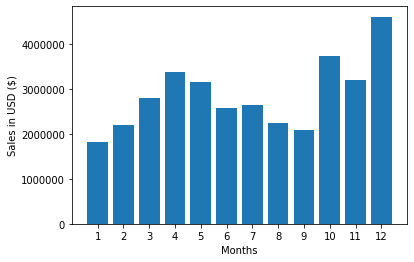

In [18]:
months = range(1,13)
plt.bar(months, groupMonth['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months")
plt.show()


### City Has Most Sales

In [19]:
# df["City"] = df["Purchase Address"].str.split(', ')
def get_city(address):
    return address.split(", ")[1]
def get_state(address):
    return address.split(", ")[2]

df["City"] = df["Purchase Address"].apply(lambda x: get_city(x) + ' ' + get_state(x))

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston MA 02215
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco CA 94016
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco CA 94016
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles CA 90001
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta GA 30301


In [20]:
groupCity = df.groupby("City").sum()

In [21]:
groupCity

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA 30301,16602,2.779908e+06,104794,2.795499e+06
Austin TX 73301,11153,1.809874e+06,69829,1.819582e+06
Boston MA 02215,22528,3.637410e+06,141112,3.661642e+06
Dallas TX 75001,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA 90001,33289,5.421435e+06,208325,5.452571e+06
New York City NY 10001,27932,4.635371e+06,175741,4.664317e+06
Portland ME 04101,2750,4.471893e+05,17144,4.497583e+05
Portland OR 97035,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA 94016,50239,8.211462e+06,315520,8.262204e+06


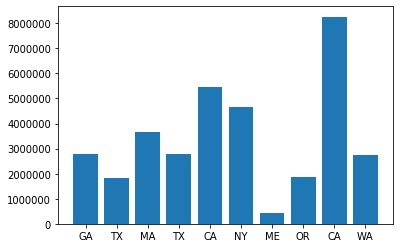

In [33]:
city = list(groupCity.index)
plt.bar(city, groupCity["Sales"])

tick = []
for i in city:
    tick.append(i.split(" ")[-2])

plt.xticks(np.arange(10), tick)
plt.show()

###What time should we display advertisements?

In [35]:
df["Order Date"]= pd.to_datetime(df["Order Date"])

In [40]:
df["Hour"] = df["Order Date"].dt.hour

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",1,2.99,Boston MA 02215,21
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",1,150.00,San Francisco CA 94016,14
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",1,389.99,San Francisco CA 94016,19
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",1,14.95,Los Angeles CA 90001,12
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",1,300.00,Atlanta GA 30301,14


In [50]:
groupTime = df.groupby("Hour").count()

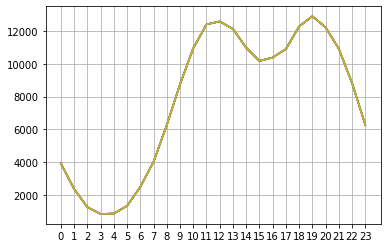

In [49]:
hours = [hour for hour, df in df.groupby("Hour")]
plt.plot(hours, df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.show()

In [51]:
groupTime

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


What products are most often sold together?

In [67]:
newDF = df[df["Order ID"].duplicated(keep=False)]
newDF["Groupped"] = newDF.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))

newDF = newDF[["Order ID", "Groupped"]].drop_duplicates()

In [68]:
newDF.head(30)

,Order ID,Groupped
70744,144271,"Lightning Charging Cable, iPhone"
70813,144339,"iPhone, Wired Headphones"
70820,144344,"USB-C Charging Cable, Google Phone"
70870,144394,"Google Phone, Wired Headphones"
71073,144584,"USB-C Charging Cable, Google Phone"
71081,144592,"iPhone, Lightning Charging Cable"
71096,144603,"USB-C Charging Cable, Google Phone"
71094,144602,"Wired Headphones, Google Phone"
71091,144600,"Lightning Charging Cable, iPhone"
71039,144551,"Lightning Charging Cable, iPhone"


In [72]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in newDF["Groupped"]:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)






('Lightning Charging Cable', 'iPhone') 525
('USB-C Charging Cable', 'Google Phone') 522
('iPhone', 'Lightning Charging Cable') 490
('Google Phone', 'USB-C Charging Cable') 477
('Wired Headphones', 'iPhone') 253
('Wired Headphones', 'Google Phone') 233
('iPhone', 'Wired Headphones') 209
('USB-C Charging Cable', 'Vareebadd Phone') 198
('iPhone', 'Apple Airpods Headphones') 191
('Google Phone', 'Wired Headphones') 190
